Name: Namrata Bhorade

Class: BE COMPS

Batch: A

UID: 2018130004

Roll No.: 03

# CEEL 82B, Data Science, 2022
# Lab 2: Implementation of Principal Component Analysis


**Objective**: To implement and use Principal Component Analysis using Python Platform

This notebook describes implementation of Principal Component Analysis (PCA) on the Behavior of the urban traffic of the city of Sao Paulo in Brazil Dataset. It consists of some data preprocessing, exploratory data analysis and stepwise implementation on PCA. After that model training is performed and model is evaluated.

In [ ]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc, r2_score

## 1. Load the dataset (Use pandas )

In [ ]:
traffic_data = pd.read_csv("/content/drive/MyDrive/DS-Lab/Lab/Exp2/Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv", sep=";")

In [ ]:
traffic_data

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"17,8"
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"18,1"
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"17,7"
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"17,4"


In [ ]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

The dataset consists of 18 columns and 135 rows. All the columns except Slowness in traffic (%) are of integer data type.

## 2. Data Preprocessing (Handling NA values)

In [ ]:
# checking for null values in each column
traffic_data.isnull().sum()

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

From above output, we cam see that there are no null values present in this dataset

Transforming Target Variable from object to float

In [ ]:
traffic_data['Slowness in traffic (%)'] = traffic_data['Slowness in traffic (%)'].str.replace(',', '.').astype(float)
traffic_data

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17.8
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,18.1
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,17.7
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17.4


In [ ]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hour (Coded)                           135 non-null    int64  
 1   Immobilized bus                        135 non-null    int64  
 2   Broken Truck                           135 non-null    int64  
 3   Vehicle excess                         135 non-null    int64  
 4   Accident victim                        135 non-null    int64  
 5   Running over                           135 non-null    int64  
 6   Fire vehicles                          135 non-null    int64  
 7   Occurrence involving freight           135 non-null    int64  
 8   Incident involving dangerous freight   135 non-null    int64  
 9   Lack of electricity                    135 non-null    int64  
 10  Fire                                   135 non-null    int64  
 11  Point 

In [ ]:
traffic_data.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,10.051852
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.363243
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.850000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.400000


### Adding Column Day

In [ ]:
hours = {7:00, 7:30, 8:00, 8:30, 9:00, 9:30, 10:00, 10:30, 11:00, 11:30, 12:00, 12:30, 13:00, 13:30, 14:00, 14:30, 15:00, 15:30, 
         16:00, 16:30, 17:00, 17:30, 18:00, 18:30, 19:00, 19:30, 20:00} # reference from dataset folder
MONDAY  = 26
TUESDAY = 53
WEDNESDAY = 80
THURSDAY = 107
FRIDAY = 134
DAYS_TO_CODE = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5}

In [ ]:
def transform_days(df, create_column=False, to_numerical=False):
    # check is day column exists if not create
    # if numerical transformation, go from day to number
    # else go from number to day names
    if create_column:
        df['Day'] = '0'

    position=-1
    if to_numerical is False:
        for idx in df.index:
            if idx <= MONDAY:
                df.iloc[idx, position] = 'Monday'
            elif idx <= TUESDAY:
                df.iloc[idx, position] = 'Tuesday'
            elif idx <= WEDNESDAY:
                df.iloc[idx, position] = 'Wednesday'
            elif idx <= THURSDAY:
                df.iloc[idx, position] = 'Thursday'
            elif idx <= FRIDAY:
                df.iloc[idx, position] = 'Friday'
    else:
        df_values = df["Day"].unique()
        for key, value in DAYS_TO_CODE.items():
            assert key in df_values, "First transform your data into weekday by setting to_numerical=False, then apply the numerical transformation"
            df.loc[(df.Day == key), 'Day'] = value
        df['Day'] = df['Day'].astype(int)
        
transform_days(traffic_data, create_column=True)

In [ ]:
traffic_data

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%),Day
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,Monday
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6,Monday
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7,Monday
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2,Monday
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17.8,Friday
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,18.1,Friday
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,17.7,Friday
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17.4,Friday


### Converting Hours(Coded) column to actual Time Values

In [ ]:
hours_arr = []
for hour, minute in hours.items():
    s1 = str(hour) + ':' + '00'
    s2 = str(hour) + ':' + str(minute)
    if hour != 20:
        hours_arr.append(s1)
        hours_arr.append(s2)
    else:
        hours_arr.append(s1)

code_to_hour = {}
for code, hour in zip(traffic_data['Hour (Coded)'], hours_arr):
    code_to_hour[code] = hour

In [ ]:
def code_hour(code):
    return code_to_hour[code]

## 3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib (What variables to include, sample size)

### Plot of Traffic over the day

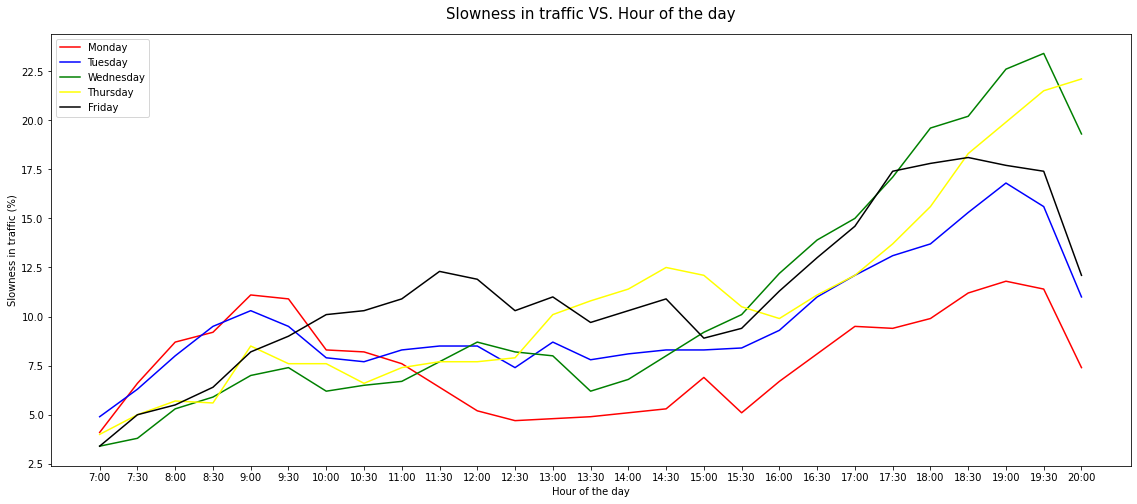

In [ ]:
def slowness_over_time(df, coded_hours=False):
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_axes([0, 0, 1, 1])

    colors = {'Monday': 'r', 'Tuesday': 'b', 'Wednesday': 'g', 'Thursday': 'yellow', 'Friday':'black'}
    transform_days(df)
    for e in df['Day'].unique():
        subset = df[df['Day'] == e]
        ax.plot(subset['Hour (Coded)'], subset['Slowness in traffic (%)'], color=colors[e])

    ax.set_title('Slowness in traffic VS. Hour of the day', fontsize=15, pad=15)
    ax.set_xlabel('Hour of the day', fontsize=10)
    ax.set_ylabel('Slowness in traffic (%)', fontsize=10)
    
    if coded_hours is False:
        ax.set_xticks(range(1, 28))
        ax.set_xticklabels(map(code_hour, subset['Hour (Coded)'].unique()))

    ax.legend(colors, fontsize=10)

    plt.show()
slowness_over_time(traffic_data)
transform_days(traffic_data, to_numerical=True)

From the above plot we can see that the slowness in traffic increases in the peak hours of the evening.

### Correlation Matrix

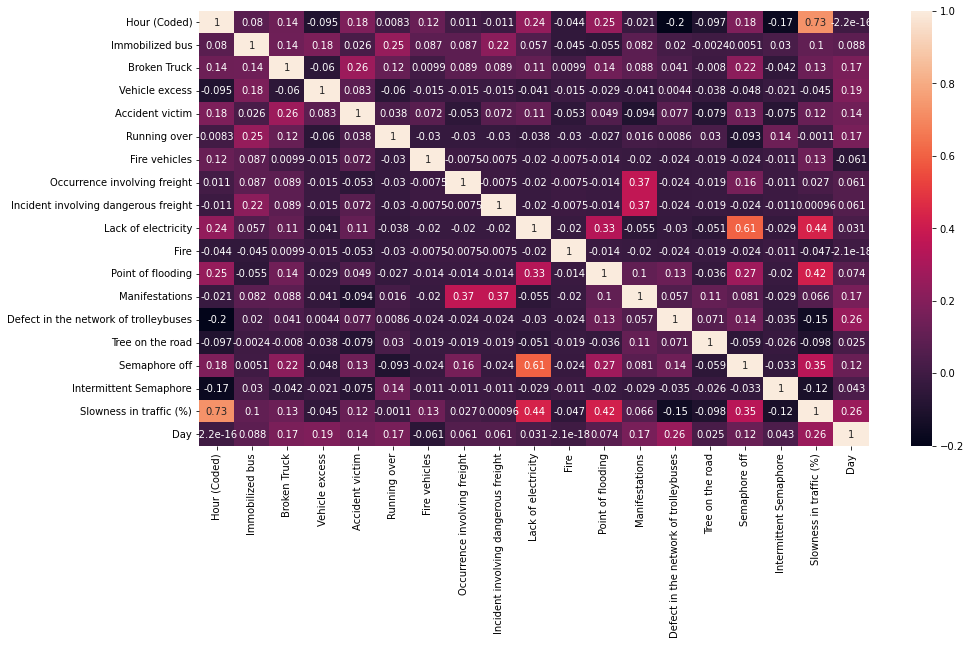

In [ ]:
correlation_data = traffic_data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(correlation_data, annot=True)
plt.show()

Arranging columns according to their correlation with Slowness in traffic (%) variable in descending order

In [ ]:
correlation_values = correlation_data['Slowness in traffic (%)'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt Slowness in traffic (%)")
print(abs(correlation_values).sort_values(ascending=False))

Correlation of Features wrt Slowness in traffic (%)
Slowness in traffic (%)                  1.000000
Hour (Coded)                             0.729962
Lack of electricity                      0.436569
Point of flooding                        0.420016
Semaphore off                            0.347242
Day                                      0.261948
Defect in the network of trolleybuses    0.147035
Fire vehicles                            0.134103
Broken Truck                             0.131998
Accident victim                          0.121730
Intermittent Semaphore                   0.119942
Immobilized bus                          0.101143
Tree on the road                         0.098489
Manifestations                           0.066377
Fire                                     0.046737
Vehicle excess                           0.045297
Occurrence involving freight             0.026791
Running over                             0.001133
Incident involving dangerous freight     0.00095

As expected, the time of the day is the variable that has the largest impact on the Slowness in Traffic among the other features. Features such as Lack of Electricity and Flooding have a considerable effect on the target variable as well.

### Removing features having very less correlation with outcome

In [ ]:
for col in range(len(correlation_values)):
    if abs(correlation_values[col]) < 0.3:
        traffic_data = traffic_data.drop([correlation_values.index[col]], axis=1)

In [ ]:
traffic_data

,Hour (Coded),Lack of electricity,Point of flooding,Semaphore off,Slowness in traffic (%)
0,1,0,0,0,4.1
1,2,0,0,0,6.6
2,3,0,0,0,8.7
3,4,0,0,0,9.2
4,5,0,0,0,11.1
...,...,...,...,...,...
130,23,0,0,0,17.8
131,24,0,0,0,18.1
132,25,0,0,0,17.7
133,26,0,0,1,17.4


### Histograms

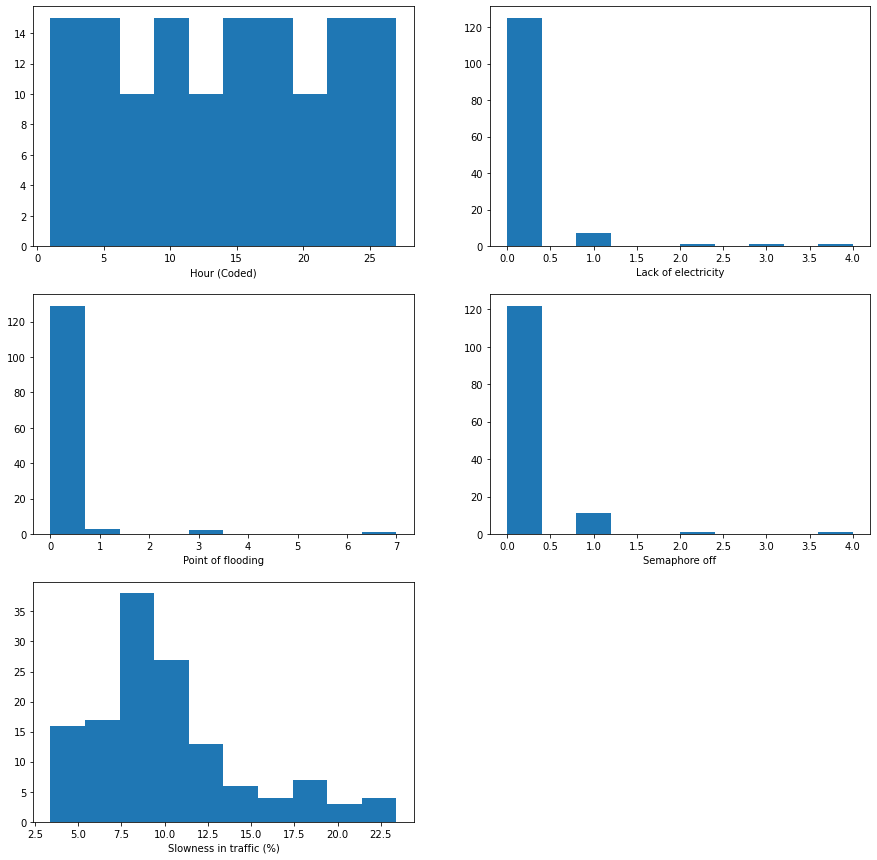

In [ ]:
plt.figure(figsize=(15,15))
col = traffic_data.columns
for i in range(0,len(col)):
    plt.subplot(len(col)//2+1,2,i+1)
    plt.hist(traffic_data[col[i]]);
    plt.xlabel(col[i])

The above plot shows the distribution of features of the dataset. We can see that the target variable i.e. Slowness in traffic (%) is slightly right skewed.

### Scatterplot Matrix

<Figure size 576x576 with 0 Axes>

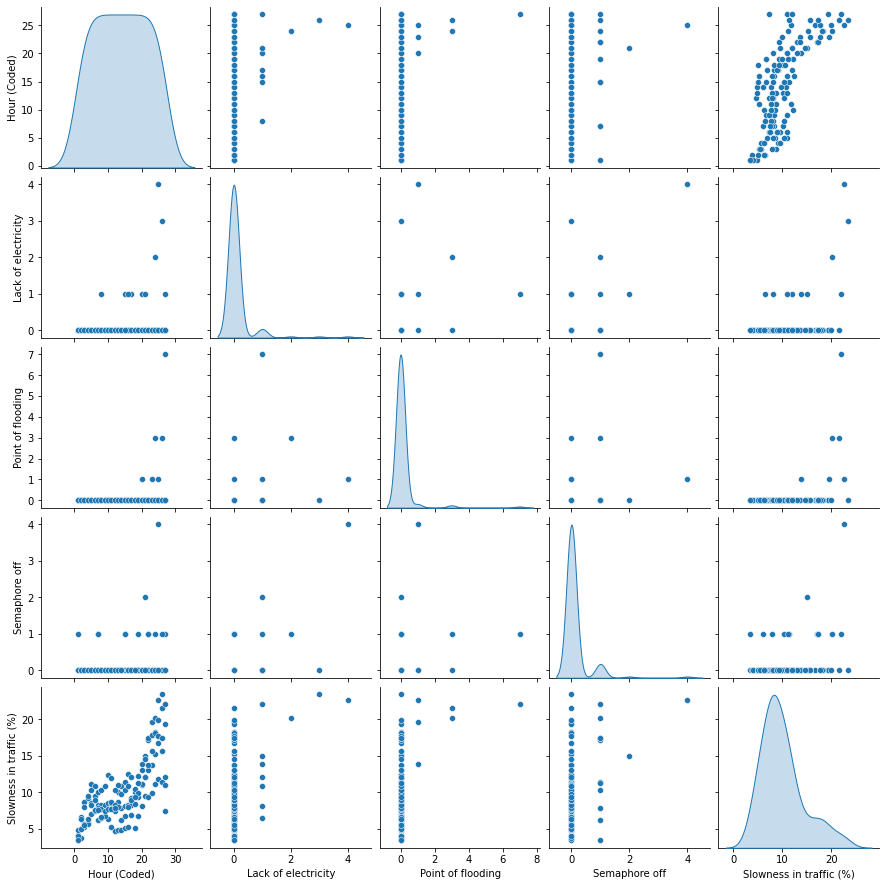

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(traffic_data, diag_kind='kde')
plt.show()

The scatterplot shows that there is a kind of linear relationship between slowness in traffic and hour of the day.

## 4. Apply Normalization and Generate Covariance Matrix

In [ ]:
X = traffic_data.drop('Slowness in traffic (%)', axis=1)
X

,Hour (Coded),Lack of electricity,Point of flooding,Semaphore off
0,1,0,0,0
1,2,0,0,0
2,3,0,0,0
3,4,0,0,0
4,5,0,0,0
...,...,...,...,...
130,23,0,0,0
131,24,0,0,0
132,25,0,0,0
133,26,0,0,1


In [ ]:
X = np.array(X)

### Normalization using StandardScaler

In [ ]:
X = StandardScaler().fit_transform(X)

### Covariance Matrix

In [ ]:
cov_mat = np.cov(X , rowvar = False)

In [ ]:
traffic_columns = list(traffic_data.drop('Slowness in traffic (%)', axis=1).columns)
cov_table = PrettyTable([' '] + traffic_columns)
for i in range(len(traffic_columns)):
    cov_table.add_row([traffic_columns[i]] + list(cov_mat[i]))
print(cov_table)

+---------------------+---------------------+---------------------+---------------------+---------------------+
|                     |     Hour (Coded)    | Lack of electricity |  Point of flooding  |    Semaphore off    |
+---------------------+---------------------+---------------------+---------------------+---------------------+
|     Hour (Coded)    |  1.0074626865671645 | 0.24019103365748978 | 0.24686114755800456 | 0.18443121870299345 |
| Lack of electricity | 0.24019103365748978 |  1.0074626865671625 |  0.336642235949281  |  0.6096778887877571 |
|  Point of flooding  | 0.24686114755800456 |  0.336642235949281  |  1.0074626865671645 |  0.2723615290085541 |
|    Semaphore off    | 0.18443121870299345 |  0.6096778887877571 |  0.2723615290085541 |  1.007462686567165  |
+---------------------+---------------------+---------------------+---------------------+---------------------+


The above table shows the covariance matrix

## 5. Apply PCA

### Eigen Values and Eigen Vectors

In [ ]:
#Step-3
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [ ]:
eigen_values

array([0.39202048, 0.7381648 , 0.91082765, 1.98883781])

In [ ]:
eigen_vectors

array([[ 0.05101099,  0.50767419, -0.77941633, -0.36355876],
       [-0.73239246,  0.12762494,  0.31130859, -0.59194604],
       [ 0.08186922, -0.82803649, -0.32398592, -0.45020675],
       [ 0.67401528,  0.20083415,  0.43661226, -0.56101585]])

Each column in the Eigen vector-matrix corresponds to a principal component

### Sorted Eigen Values and Eigen Vectors

In [ ]:
#Step-4
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [ ]:
sorted_eigenvalue

array([1.98883781, 0.91082765, 0.7381648 , 0.39202048])

In [ ]:
sorted_eigenvectors

array([[-0.36355876, -0.77941633,  0.50767419,  0.05101099],
       [-0.59194604,  0.31130859,  0.12762494, -0.73239246],
       [-0.45020675, -0.32398592, -0.82803649,  0.08186922],
       [-0.56101585,  0.43661226,  0.20083415,  0.67401528]])

### Selecting a subset from the rearranged Eigenvalue matrix

In [ ]:
num_components = 2

#Step-5
eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
#Step-6
X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()

In [ ]:
eigenvector_subset

array([[-0.36355876, -0.77941633],
       [-0.59194604,  0.31130859],
       [-0.45020675, -0.32398592],
       [-0.56101585,  0.43661226]])

In [ ]:
principal_data =  pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
principal_data = pd.concat([principal_data, traffic_data['Slowness in traffic (%)']], axis=1)
principal_data

,PC1,PC2,Slowness in traffic (%)
0,0.974301,1.162621,4.1
1,0.927624,1.062553,6.6
2,0.880948,0.962486,8.7
3,0.834271,0.862418,9.2
4,0.787594,0.762350,11.1
...,...,...,...
130,-0.052585,-1.038871,17.8
131,-0.099262,-1.138939,18.1
132,-0.145938,-1.239006,17.7
133,-1.406002,-0.394752,17.4


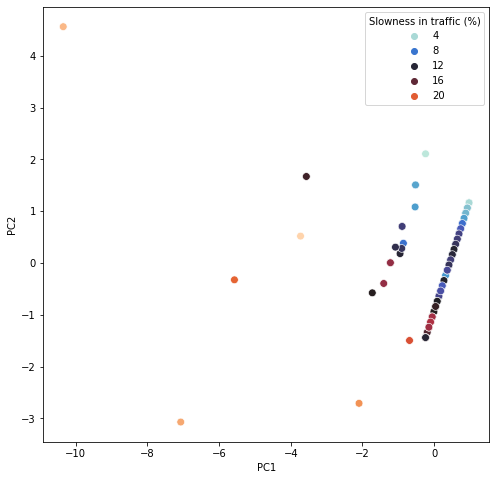

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = principal_data , x = 'PC1',y = 'PC2' , hue = 'Slowness in traffic (%)' , s = 60 , palette= 'icefire')
plt.show()

The above plot shows the slowness of traffic wrt to the two principle components obtained, PC1 on x-axis and PC2 on y-axis.


## 6. Build the model, summarize it and evaluate the model and Summarize


In [ ]:
# Independent attributes
X = principal_data.drop(columns='Slowness in traffic (%)')

# Dependent attributes
Y = principal_data[['Slowness in traffic (%)']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=65)

### Build the model

In [ ]:
# Create linear regression object
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

### Summarize the model

In [ ]:
linear_regression_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### Prediction

In [ ]:
y_pred = linear_regression_model.predict(X_test)

In [ ]:
for idx, col_name in enumerate(principal_data.drop(columns='Slowness in traffic (%)').columns):
    print(f"Coefficient for {col_name}: {linear_regression_model.coef_[0][idx]}")

Coefficient for PC1: -1.895392125491657
Coefficient for PC2: -2.025739897308292


### Model Evaluation

In [ ]:
linear_regression_score = linear_regression_model.score(X_test, y_test)
print("Score of Linear Regression Model: ", round(linear_regression_score, 5))

Score of Linear Regression Model:  0.79782


In [ ]:
print("Mean Squared Error (MSE): ", round(mean_squared_error(y_test, y_pred), 5))

Mean Squared Error (MSE):  5.24612


In [ ]:
print("Root Mean Squared Error (RMSE): ", round(math.sqrt(mean_squared_error(y_test, y_pred)),5))

Root Mean Squared Error (RMSE):  2.29044


# Conclusion 

1. PCA reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset.
2. It makes the training of algorithm faster by reducing the number of dimensions of the data.
3. Data preprocessing is performed on the traffic dataset and then the datset is transformed into 2 pricipal components.
4. Linear regression model is trained on this transformed data and the coefficients suggest that the second principal component i.e. PC2 is having more importance in prediction than the first principal component i.e. PC1
5. The regression score of the model is 0.79782 and Mean Square Error (MSE) is 5.24612. As there are very few samples in the dataset, the regression score is less.